In [2]:
import os
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Input, Activation, Flatten, Dense, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image, display

Using TensorFlow backend.


In [3]:
batch_size = 32

classes = ['apple', 'banana', 'cherry', 'grape', 'melon', 'orange', 'strawberry']
nb_classes = len(classes)

img_rows = 100
img_cols = 100
channels = 3

train_data_dir = './data/train'
validation_data_dir = './data/validation'

epochs = 50

result_dir = './results'

In [4]:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [5]:
input_tensor = Input(shape=(img_rows, img_cols, channels))
base_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [6]:
x = base_model.output
x = Flatten(input_shape=base_model.output_shape[1:])(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [10]:
model.layers[:15]

In [11]:
# 最後のconv層の直前までの層をfreeze
for layer in model.layers[:15]:
    layer.trainable = False

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,# シアー変換
    zoom_range=0.2, #  ランダムに　ズーム
    rotation_range=5, # ランダムに回転する角度
    horizontal_flip=True # 水平方向に反転
)

In [15]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    color_mode='rgb',
    classes=classes,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True)

Found 4565 images belonging to 7 classes.
Found 697 images belonging to 7 classes.


In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/50
142/142 [==============================] - 1126s - loss: 1.6478 - acc: 0.4173 - val_loss: 1.6168 - val_acc: 0.4390
Epoch 2/50
142/142 [==============================] - 6877s - loss: 1.2706 - acc: 0.5719 - val_loss: 1.2805 - val_acc: 0.5308
Epoch 3/50
142/142 [==============================] - 1083s - loss: 1.0676 - acc: 0.6470 - val_loss: 1.2083 - val_acc: 0.5789
Epoch 4/50
142/142 [==============================] - 7750s - loss: 0.9398 - acc: 0.6946 - val_loss: 0.9997 - val_acc: 0.6406
Epoch 5/50
142/142 [==============================] - 1052s - loss: 0.8562 - acc: 0.7223 - val_loss: 1.0332 - val_acc: 0.6226
Epoch 6/50
142/142 [==============================] - 1034s - loss: 0.7656 - acc: 0.7517 - val_loss: 0.9201 - val_acc: 0.6496
Epoch 7/50
142/142 [==============================] - 1061s - loss: 0.7106 - acc: 0.7636 - val_loss: 0.9135 - val_acc: 0.6752
Epoch 8/50
142/142 [==============================] - 1148s - loss: 0.6628 - acc: 0.7806 - val_loss: 0.8268 - val_acc:

In [18]:
history.history

{'acc': [0.41725352112676056,
  0.57224795942850359,
  0.64703287016916766,
  0.69490403717989013,
  0.72270019866235202,
  0.75181998684262696,
  0.76351202299545962,
  0.78049856612363089,
  0.78138098397476896,
  0.79152878894728063,
  0.8089565409747228,
  0.8206485771407046,
  0.82175159944805276,
  0.83035517321394525,
  0.84094418712517505,
  0.84204720939307609,
  0.85263622329115685,
  0.84888594754873559,
  0.86013677480229733,
  0.86521067730827672,
  0.87271122876682106,
  0.86741672187037688,
  0.87602029563626937,
  0.8848444739109681,
  0.88043238474732066,
  0.88705051843362115,
  0.88660930954749917,
  0.8857268916963611,
  0.89830134570033193,
  0.89410986103234169,
  0.90315464375010135,
  0.90734612843124063,
  0.90690491951882068,
  0.90668431503631253,
  0.90712552396188162,
  0.91462607545987307,
  0.91264063534083384,
  0.91749393339060326,
  0.92036179136078067,
  0.92080300024690254,
  0.91639091110955317,
  0.92300904479585366,
  0.92720052951644016,
  0.9267

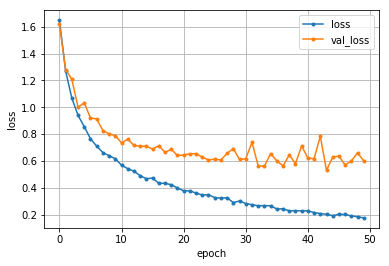

In [19]:
# plot results
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

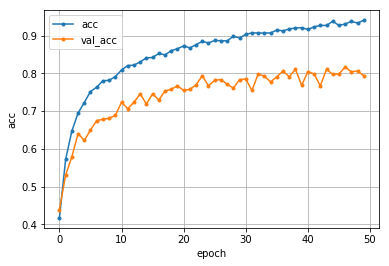

In [20]:
# plot results
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [21]:
import pickle

In [22]:
with open('./results/history1.pkl', mode='wb') as f:
    pickle.dump(history.history, f)

In [23]:
model.save('./results/vgg16-finetuning.h5')

In [24]:
def predict(img_file_path):
    
    display(Image(img_file_path, width=150, unconfined=True))
    img = image.load_img(img_file_path, target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # 学習時にImageDataGeneratorのrescaleで正規化したので同じ処理が必要！
    # これを忘れると結果がおかしくなるので注意
    x = x / 255.0

    # クラスを予測
    # 入力は1枚の画像なので[0]のみ
    pred = model.predict(x)[0]

    # 予測確率が高いトップ5を出力
    top = 5
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    for x in result:
        print(x)

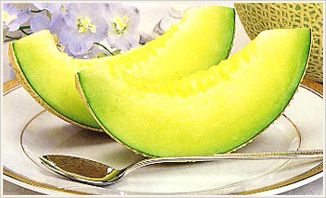

('banana', 0.838723)
('melon', 0.10895911)
('apple', 0.050112203)
('orange', 0.0021279636)
('grape', 5.3197895e-05)


In [26]:
predict('./data/samples/img_thumb_02.jpg')
# 失敗!

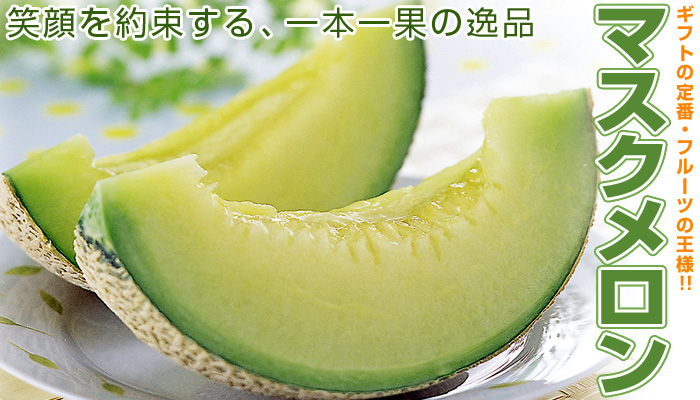

('banana', 0.63188195)
('apple', 0.23783392)
('melon', 0.1283702)
('orange', 0.00089813874)
('grape', 0.00065035705)


In [29]:
predict('./data/samples/mask_melon_image01.jpg')

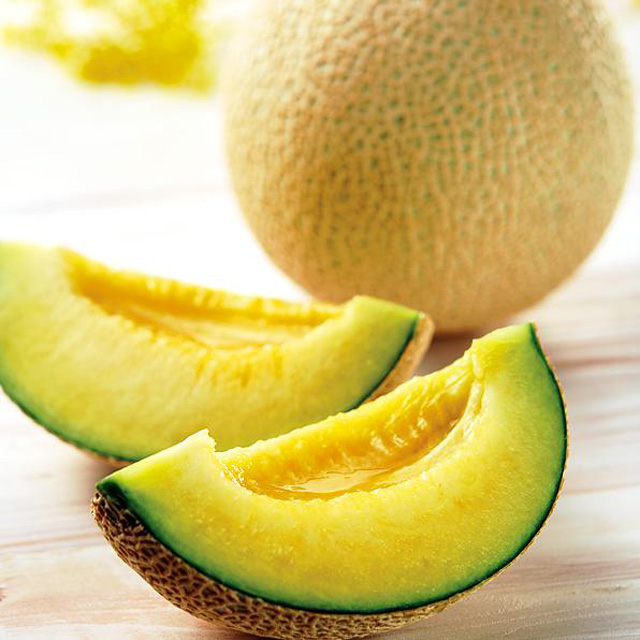

('banana', 0.48749924)
('melon', 0.38574073)
('orange', 0.11580983)
('apple', 0.010310666)
('grape', 0.00057120045)


In [30]:
predict('./data/samples/TB143d4FVXXXXb4XVXXXXXXXXXX_!!0-item_pic.jpg')

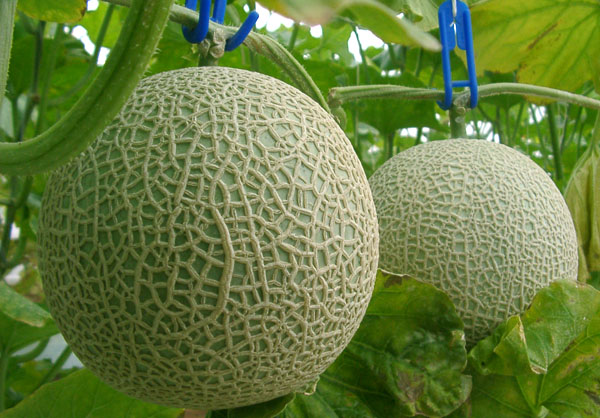

('apple', 0.73628449)
('melon', 0.087898284)
('orange', 0.084462717)
('strawberry', 0.065733865)
('grape', 0.025039377)


In [31]:
predict('./data/samples/melongari5.jpg')

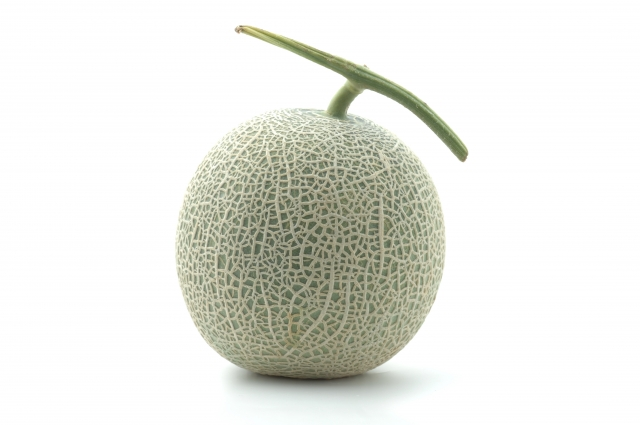

('apple', 0.76276064)
('melon', 0.15547407)
('strawberry', 0.025620794)
('cherry', 0.021803314)
('orange', 0.017887086)


In [32]:
predict('./data/samples/078a94a2a379390f483768b529137fa2.jpg')

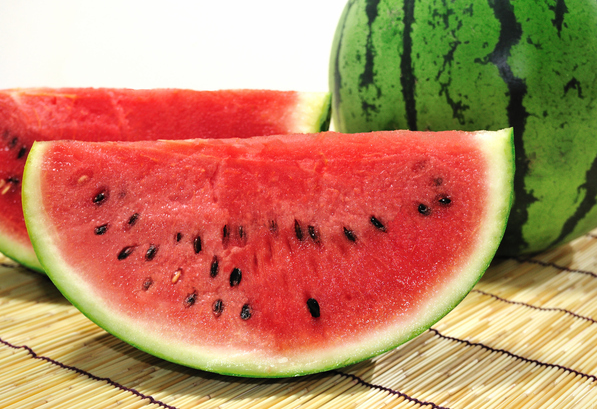

('melon', 0.9996106)
('strawberry', 0.00038454565)
('apple', 1.361337e-06)
('orange', 1.2893711e-06)
('banana', 1.0994855e-06)


In [33]:
predict('./data/samples/20160622155230.png')

In [34]:
%who

Activation	 Dense	 Dropout	 Flatten	 Image	 ImageDataGenerator	 Input	 Model	 Sequential	 
VGG16	 acc	 base_model	 batch_size	 channels	 classes	 display	 epochs	 f	 
history	 image	 img_cols	 img_rows	 input_tensor	 layer	 loss	 model	 nb_classes	 
np	 optimizers	 os	 pickle	 plt	 predict	 predictions	 result_dir	 test_datagen	 
train_data_dir	 train_datagen	 train_generator	 val_acc	 val_loss	 validation_data_dir	 validation_generator	 x	 


In [35]:
%whos

Variable               Type                  Data/Info
------------------------------------------------------
Activation             type                  <class 'keras.layers.core.Activation'>
Dense                  type                  <class 'keras.layers.core.Dense'>
Dropout                type                  <class 'keras.layers.core.Dropout'>
Flatten                type                  <class 'keras.layers.core.Flatten'>
Image                  type                  <class 'IPython.core.display.Image'>
ImageDataGenerator     type                  <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
Input                  function              <function Input at 0x1167a1158>
Model                  type                  <class 'keras.engine.training.Model'>
Sequential             type                  <class 'keras.models.Sequential'>
VGG16                  function              <function VGG16 at 0x11a4e9048>
acc                    list                  n=50
base_model      